# Aula 1 - Modelo de Regressão

## 1.1 Apresentação

## 1.2 Carregando os dados

[JSON Viewer](http://jsonviewer.stack.hu)

[Pandas: read_json](https://pandas.pydata.org/docs/reference/api/pandas.read_json.html?highlight=read_json#pandas.read_json)


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
dados = pd.read_json(
    path_or_buf = 'https://raw.githubusercontent.com/alura-cursos/2570-regressao-com-sklearn/main/dados/imoveis.json',
    orient = 'columns'
)
dados.head()

,ident,listing
0,"{'customerID': '775564-BOJSMVON', 'source': 'W...","{'types': {'unit': 'Outros', 'usage': 'Residen..."
1,"{'customerID': '660895-AUENKNYY', 'source': 'W...","{'types': {'unit': 'Apartamento', 'usage': 'Re..."
2,"{'customerID': '751522-JESYFEQL', 'source': 'W...","{'types': {'unit': 'Outros', 'usage': 'Residen..."
3,"{'customerID': '714052-GAAEWYKS', 'source': 'W...","{'types': {'unit': 'Outros', 'usage': 'Comerci..."
4,"{'customerID': '568886-ZIBFOMCC', 'source': 'W...","{'types': {'unit': 'Apartamento', 'usage': 'Re..."


### Explorar as informações

In [ ]:
dados.ident[0]

{'customerID': '775564-BOJSMVON', 'source': 'Website'}

In [ ]:
dados.listing[0]

{'types': {'unit': 'Outros', 'usage': 'Residencial'},
 'address': {'city': 'Rio de Janeiro',
  'location': {'lon': -43.413557, 'lat': -22.909429},
  'zone': 'Zona Oeste',
  'neighborhood': 'Taquara'},
 'prices': {'price': '45000', 'tax': {'iptu': '0', 'condo': '150'}},
 'features': {'bedrooms': 0,
  'bathrooms': 0,
  'suites': 0,
  'parkingSpaces': 1,
  'usableAreas': '62',
  'totalAreas': '62',
  'floors': 0,
  'unitsOnTheFloor': 0,
  'unitFloor': 0}}

## 1.3 Tratamento de dados inicial

### Normalização

In [ ]:
dados_lista1 = pd.json_normalize(data = dados.listing, sep='_')
dados_lista1

,types_unit,types_usage,address_city,address_location_lon,address_location_lat,address_zone,address_neighborhood,prices_price,prices_tax_iptu,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
0,Outros,Residencial,Rio de Janeiro,-43.413557,-22.909429,Zona Oeste,Taquara,45000,0,150,0,0,0,1,62,62,0,0,0
1,Apartamento,Residencial,Rio de Janeiro,-43.509141,-22.869698,Zona Oeste,Santíssimo,45000,0,120,2,1,0,1,44,0,0,0,0
2,Outros,Residencial,Rio de Janeiro,-43.646786,-22.986927,Zona Oeste,Pedra de Guaratiba,50000,0,100,0,0,0,0,132,132,0,0,0
3,Outros,Comercial,Rio de Janeiro,-43.330818,-22.881977,Zona Norte,Cascadura,45000,346,468,0,1,0,0,32,32,0,0,3
4,Apartamento,Residencial,Rio de Janeiro,-43.480742,-23.027653,Zona Oeste,Recreio dos Bandeirantes,50000,120,400,3,2,1,1,60,0,3,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73610,Casa,Residencial,Rio de Janeiro,-43.388906,-23.003960,Zona Oeste,Barra da Tijuca,10000000,2900,2350,5,10,1,4,1024,1024,0,0,0
73611,Casa,Residencial,Rio de Janeiro,-43.395032,-23.000902,Zona Oeste,Barra da Tijuca,10000000,15000,3000,5,7,5,6,750,1250,0,0,0
73612,Apartamento,Residencial,Rio de Janeiro,-43.189682,-22.987018,Zona Sul,Copacabana,10000000,None,None,4,5,4,3,328,328,0,0,0
73613,Casa,Residencial,Rio de Janeiro,-43.351836,-23.005037,Zona Oeste,Barra da Tijuca,10000000,35000,2400,5,10,5,4,1024,1024,0,0,3


In [ ]:
dados_lista2 = pd.json_normalize(data = dados.ident, sep='_')
dados_lista2

,customerID,source
0,775564-BOJSMVON,Website
1,660895-AUENKNYY,Website
2,751522-JESYFEQL,Website
3,714052-GAAEWYKS,Website
4,568886-ZIBFOMCC,Website
...,...,...
73610,134148-MJIBCMDQ,Website
73611,541465-QBQVXXXZ,Website
73612,800542-BZREFTQS,Website
73613,939419-ECGUNTIH,Website


### Junção dos dataframes

In [ ]:
dados_imoveis = pd.concat([dados_lista1, dados_lista2], axis = 'columns')
dados_imoveis.head()

,types_unit,types_usage,address_city,address_location_lon,address_location_lat,address_zone,address_neighborhood,prices_price,prices_tax_iptu,prices_tax_condo,...,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor,customerID,source
0,Outros,Residencial,Rio de Janeiro,-43.413557,-22.909429,Zona Oeste,Taquara,45000,0,150,...,0,0,1,62,62,0,0,0,775564-BOJSMVON,Website
1,Apartamento,Residencial,Rio de Janeiro,-43.509141,-22.869698,Zona Oeste,Santíssimo,45000,0,120,...,1,0,1,44,0,0,0,0,660895-AUENKNYY,Website
2,Outros,Residencial,Rio de Janeiro,-43.646786,-22.986927,Zona Oeste,Pedra de Guaratiba,50000,0,100,...,0,0,0,132,132,0,0,0,751522-JESYFEQL,Website
3,Outros,Comercial,Rio de Janeiro,-43.330818,-22.881977,Zona Norte,Cascadura,45000,346,468,...,1,0,0,32,32,0,0,3,714052-GAAEWYKS,Website
4,Apartamento,Residencial,Rio de Janeiro,-43.480742,-23.027653,Zona Oeste,Recreio dos Bandeirantes,50000,120,400,...,2,1,1,60,0,3,4,2,568886-ZIBFOMCC,Website


In [ ]:
dados_imoveis.shape

(73615, 21)

In [ ]:
for x in dados_imoveis.keys():
  print('======'*30)
  print(dados_imoveis[x].value_counts())

Apartamento    59106
Casa            9389
Outros          5120
Name: types_unit, dtype: int64
Residencial    69596
Comercial       4019
Name: types_usage, dtype: int64
Rio de Janeiro        73607
Queimados                 3
São Gonçalo               2
Cachoeirinha              1
São João de Meriti        1
Armação dos Búzios        1
Name: address_city, dtype: int64
-43.365895    399
-43.462590    278
-43.333066    236
-43.383834    232
-43.516473    218
             ... 
-43.231882      1
-43.236952      1
-43.240152      1
-43.185712      1
-43.250934      1
Name: address_location_lon, Length: 25753, dtype: int64
-23.000371    399
-23.017479    278
-22.937463    236
-22.966600    232
-23.015968    218
             ... 
-22.916667      1
-22.904453      1
-22.927386      1
-22.944062      1
-22.998918      1
Name: address_location_lat, Length: 25552, dtype: int64
Zona Oeste      37116
Zona Sul        19222
Zona Norte      15191
Zona Central     1921
                  165
Name: address

## 1.4 Limpeza

### Filtro

In [ ]:
#Quero apenas imoveis residenciais
filtro = (dados_imoveis.types_usage == 'Residencial') & (dados_imoveis.address_city == 'Rio de Janeiro')
dados_imoveis=dados_imoveis[filtro]
dados_imoveis


,types_unit,types_usage,address_city,address_location_lon,address_location_lat,address_zone,address_neighborhood,prices_price,prices_tax_iptu,prices_tax_condo,...,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor,customerID,source
0,Outros,Residencial,Rio de Janeiro,-43.413557,-22.909429,Zona Oeste,Taquara,45000,0,150,...,0,0,1,62,62,0,0,0,775564-BOJSMVON,Website
1,Apartamento,Residencial,Rio de Janeiro,-43.509141,-22.869698,Zona Oeste,Santíssimo,45000,0,120,...,1,0,1,44,0,0,0,0,660895-AUENKNYY,Website
2,Outros,Residencial,Rio de Janeiro,-43.646786,-22.986927,Zona Oeste,Pedra de Guaratiba,50000,0,100,...,0,0,0,132,132,0,0,0,751522-JESYFEQL,Website
4,Apartamento,Residencial,Rio de Janeiro,-43.480742,-23.027653,Zona Oeste,Recreio dos Bandeirantes,50000,120,400,...,2,1,1,60,0,3,4,2,568886-ZIBFOMCC,Website
5,Outros,Residencial,Rio de Janeiro,-43.571183,-22.966059,Zona Oeste,Guaratiba,50000,None,0,...,0,0,0,200,200,0,0,0,526755-OBLTYTEN,Website
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73610,Casa,Residencial,Rio de Janeiro,-43.388906,-23.003960,Zona Oeste,Barra da Tijuca,10000000,2900,2350,...,10,1,4,1024,1024,0,0,0,134148-MJIBCMDQ,Website
73611,Casa,Residencial,Rio de Janeiro,-43.395032,-23.000902,Zona Oeste,Barra da Tijuca,10000000,15000,3000,...,7,5,6,750,1250,0,0,0,541465-QBQVXXXZ,Website
73612,Apartamento,Residencial,Rio de Janeiro,-43.189682,-22.987018,Zona Sul,Copacabana,10000000,None,None,...,5,4,3,328,328,0,0,0,800542-BZREFTQS,Website
73613,Casa,Residencial,Rio de Janeiro,-43.351836,-23.005037,Zona Oeste,Barra da Tijuca,10000000,35000,2400,...,10,5,4,1024,1024,0,0,3,939419-ECGUNTIH,Website


### Tipos de variáveis

In [ ]:
#Retorna os tipos das features
dados_imoveis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69588 entries, 0 to 73614
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   types_unit                69588 non-null  object 
 1   types_usage               69588 non-null  object 
 2   address_city              69588 non-null  object 
 3   address_location_lon      69449 non-null  float64
 4   address_location_lat      69449 non-null  float64
 5   address_zone              69588 non-null  object 
 6   address_neighborhood      69588 non-null  object 
 7   prices_price              69588 non-null  object 
 8   prices_tax_iptu           60863 non-null  object 
 9   prices_tax_condo          63527 non-null  object 
 10  features_bedrooms         69588 non-null  int64  
 11  features_bathrooms        69588 non-null  int64  
 12  features_suites           69588 non-null  int64  
 13  features_parkingSpaces    69588 non-null  int64  
 14  featur

Verificando a saída do `.info`

> 69588 entries, 0 to 73614

 percebemos que temos que resentar o index, para que as infos fiquem ordenadas corretamente.
 

In [ ]:
#os indices estão bagunçados, logo vou reseta-los
dados_imoveis.reset_index(
    drop = True, #remove o indice antigo
    inplace = True
)

In [ ]:
#Outra forma de ver as infos
dados_imoveis.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69588 entries, 0 to 69587
Columns: 21 entries, types_unit to source
dtypes: float64(2), int64(7), object(12)
memory usage: 11.1+ MB


Agora está correto.

In [ ]:
#Há features que estão no formato string mas deveriam estar no valor numerico
#Posso mudar os tipos dessas features com df.astype()

dados_imoveis = dados_imoveis.astype(
    {
        'prices_price' : 'float64',
        'prices_tax_iptu' : 'float64',
        'prices_tax_condo' : 'float64',
        'features_usableAreas' : 'int64',
        'features_totalAreas' : 'int64'
    }
)

dados_imoveis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69588 entries, 0 to 69587
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   types_unit                69588 non-null  object 
 1   types_usage               69588 non-null  object 
 2   address_city              69588 non-null  object 
 3   address_location_lon      69449 non-null  float64
 4   address_location_lat      69449 non-null  float64
 5   address_zone              69588 non-null  object 
 6   address_neighborhood      69588 non-null  object 
 7   prices_price              69588 non-null  float64
 8   prices_tax_iptu           60863 non-null  float64
 9   prices_tax_condo          63527 non-null  float64
 10  features_bedrooms         69588 non-null  int64  
 11  features_bathrooms        69588 non-null  int64  
 12  features_suites           69588 non-null  int64  
 13  features_parkingSpaces    69588 non-null  int64  
 14  featur

## 1.5 - Tratamento de dados final

### Lidando com dados nulos

#### Dados nulos zone

In [ ]:
#Ha valores vazios em zona
dados_imoveis.address_zone.value_counts()

Zona Oeste      35523
Zona Sul        18535
Zona Norte      14379
Zona Central     1002
                  149
Name: address_zone, dtype: int64

In [ ]:
#Substituo os valores '' por nan
dados_imoveis.address_zone = dados_imoveis.address_zone.replace('', np.nan)

In [ ]:
dados_imoveis.address_zone.isnull().sum()

149

In [ ]:
from pandas.io.formats.style_render import Subset
selecao = ~dados_imoveis.address_zone.isna() #Seleciono todos as linhas nao nulas de dados_imoveis['address_zone'], ou seja, seleciono as zonas nao NaN
dados_imoveis[selecao].drop_duplicates(subset = ['address_neighborhood']) #Removo as linhas duplicadas em relação aos bairros

,types_unit,types_usage,address_city,address_location_lon,address_location_lat,address_zone,address_neighborhood,prices_price,prices_tax_iptu,prices_tax_condo,...,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor,customerID,source
0,Outros,Residencial,Rio de Janeiro,-43.413557,-22.909429,Zona Oeste,Taquara,45000.0,0.0,150.0,...,0,0,1,62,62,0,0,0,775564-BOJSMVON,Website
1,Apartamento,Residencial,Rio de Janeiro,-43.509141,-22.869698,Zona Oeste,Santíssimo,45000.0,0.0,120.0,...,1,0,1,44,0,0,0,0,660895-AUENKNYY,Website
2,Outros,Residencial,Rio de Janeiro,-43.646786,-22.986927,Zona Oeste,Pedra de Guaratiba,50000.0,0.0,100.0,...,0,0,0,132,132,0,0,0,751522-JESYFEQL,Website
3,Apartamento,Residencial,Rio de Janeiro,-43.480742,-23.027653,Zona Oeste,Recreio dos Bandeirantes,50000.0,120.0,400.0,...,2,1,1,60,0,3,4,2,568886-ZIBFOMCC,Website
4,Outros,Residencial,Rio de Janeiro,-43.571183,-22.966059,Zona Oeste,Guaratiba,50000.0,NaN,0.0,...,0,0,0,200,200,0,0,0,526755-OBLTYTEN,Website
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22125,Apartamento,Residencial,Rio de Janeiro,-43.197861,-22.986763,Zona Sul,Ipanema,485000.0,750.0,650.0,...,1,0,0,30,30,12,10,8,907281-NDKXWBUD,Website
27693,Apartamento,Residencial,Rio de Janeiro,-43.198450,-22.942318,Zona Sul,Cosme Velho,590000.0,90.0,500.0,...,1,0,0,77,77,0,0,0,680244-ONBPWTUC,Website
28556,Outros,Residencial,Rio de Janeiro,-43.172897,-22.906847,Zona Central,Área Rural de Rio de Janeiro,600000.0,0.0,0.0,...,0,0,0,0,0,0,0,0,445496-DTNEZSHE,Website
43829,Apartamento,Residencial,Rio de Janeiro,-43.271541,-22.999023,Zona Sul,Joá,980000.0,250.0,1200.0,...,2,1,1,110,110,0,0,0,505027-MHKZWGJJ,Website


**.to_dict**
* Transforma um dataframe em um dicionario <br>
<a href='https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_dict.html'> Documentacao </a>

In [ ]:
#O parametro orient determina como vai ser o dicionario retornado
#o valor 'records' retorna  uma lista de dicionarios com coluna como chave e o valor como elemento
dici =  dados_imoveis[selecao].drop_duplicates(subset = ['address_neighborhood']).to_dict(orient='records')
dici[:2]

[{'types_unit': 'Outros',
  'types_usage': 'Residencial',
  'address_city': 'Rio de Janeiro',
  'address_location_lon': -43.413557,
  'address_location_lat': -22.909429,
  'address_zone': 'Zona Oeste',
  'address_neighborhood': 'Taquara',
  'prices_price': 45000.0,
  'prices_tax_iptu': 0.0,
  'prices_tax_condo': 150.0,
  'features_bedrooms': 0,
  'features_bathrooms': 0,
  'features_suites': 0,
  'features_parkingSpaces': 1,
  'features_usableAreas': 62,
  'features_totalAreas': 62,
  'features_floors': 0,
  'features_unitsOnTheFloor': 0,
  'features_unitFloor': 0,
  'customerID': '775564-BOJSMVON',
  'source': 'Website'},
 {'types_unit': 'Apartamento',
  'types_usage': 'Residencial',
  'address_city': 'Rio de Janeiro',
  'address_location_lon': -43.509141,
  'address_location_lat': -22.869698,
  'address_zone': 'Zona Oeste',
  'address_neighborhood': 'Santíssimo',
  'prices_price': 45000.0,
  'prices_tax_iptu': 0.0,
  'prices_tax_condo': 120.0,
  'features_bedrooms': 2,
  'features_ba

In [ ]:
#Criando dicionario dos bairros por zona
dici_zona =  {dic['address_neighborhood']: dic['address_zone'] for dic in dici}
dici_zona

{'Taquara': 'Zona Oeste',
 'Santíssimo': 'Zona Oeste',
 'Pedra de Guaratiba': 'Zona Oeste',
 'Recreio dos Bandeirantes': 'Zona Oeste',
 'Guaratiba': 'Zona Oeste',
 'Jacarezinho': 'Zona Norte',
 'Santa Cruz': 'Zona Oeste',
 'Vargem Grande': 'Zona Oeste',
 'Bangu': 'Zona Oeste',
 'Tanque': 'Zona Oeste',
 'Santo Cristo': 'Zona Central',
 'Coelho Neto': 'Zona Norte',
 'Bento Ribeiro': 'Zona Norte',
 'Campo Grande': 'Zona Oeste',
 'Oswaldo Cruz': 'Zona Norte',
 'Camorim': 'Zona Oeste',
 'Sepetiba': 'Zona Oeste',
 'Vigário Geral': 'Zona Norte',
 'Campinho': 'Zona Norte',
 'Realengo': 'Zona Oeste',
 'Jacarepaguá': 'Zona Oeste',
 'Cidade de Deus': 'Zona Oeste',
 'Honório Gurgel': 'Zona Norte',
 'Centro': 'Zona Central',
 'Cosmos': 'Zona Oeste',
 'Tomás Coelho': 'Zona Norte',
 'Cascadura': 'Zona Norte',
 'Pavuna': 'Zona Norte',
 'Paciência': 'Zona Oeste',
 'Praça Seca': 'Zona Oeste',
 'Vila Valqueire': 'Zona Oeste',
 'Inhoaíba': 'Zona Oeste',
 'Vicente de Carvalho': 'Zona Norte',
 'Senador Vasc

In [ ]:
#Substituindo todos os valores de zona de acordo com o bairro

#Bizu: Posso substituir valores especificos de um dataframe com o loc
#Bizu: Posso usar .loc com uma series booleana ao invez do rotulo da linha
#Perigo: para substituir valores de UMA coluna com loc devo passar dois arugmentos:
#loc[series_boolena ou rotulo_linha, 'nome_coluna']
for bairro, zona in dici_zona.items():
  dados_imoveis.loc[dados_imoveis.address_neighborhood == bairro, 'address_zone']= zona 

In [ ]:
dados_imoveis['address_zone'].isnull().sum()

0

#### Dados nulos prices

In [ ]:
dados_imoveis.prices_tax_condo.isnull().sum()

6061

In [ ]:
dados_imoveis.prices_tax_iptu.isnull().sum()

8725

In [ ]:
dados_imoveis.prices_tax_iptu.fillna(0, inplace = True)
dados_imoveis.prices_tax_condo.fillna(0, inplace = True)

In [ ]:
print("Preços nulos:",dados_imoveis.prices_tax_condo.isnull().sum())
print("IPTUs nulos: ",dados_imoveis.prices_tax_iptu.isnull().sum())

Preços nulos: 0
IPTUs nulos:  0


### Alterar o nome das colunas e seleção de variáveis

In [ ]:
#Retirando coluna inuteis
dados_imoveis.drop(['customerID','types_usage', 'address_city',
                    'address_location_lon','address_location_lat', 'address_neighborhood'], axis= 'columns',inplace =True)

In [ ]:
dicionario_colunas = {
                        'type_unit': 'unit', 'address_zone': 'zone', 'prices_price': 'price', 'prices_tax_condo': 'tax_condo', 
                        'prices_tax_iptu': 'tax_iptu', 'features_bedroom': 'bedrooms', 'features_bathrooms': 'bathrooms', 
                        'features_suites': 'suites', 'features_parkingspaces': 'parkingspaces', 'features_usableAreas': 'usableAreas', 
                        'features_totalAreas': 'totalAreas', 'features_floors': 'floors', 'features_unitsOnTheFloor': 'unitsOnTheFloor', 
                        'features_unitFloor': 'unitFloor'
                      }

dados_imoveis = dados_imoveis.rename(dicionario_colunas, axis = 'columns')
dados_imoveis.head()

,types_unit,zone,price,tax_iptu,tax_condo,features_bedrooms,bathrooms,suites,features_parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor,source
0,Outros,Zona Oeste,45000.0,0.0,150.0,0,0,0,1,62,62,0,0,0,Website
1,Apartamento,Zona Oeste,45000.0,0.0,120.0,2,1,0,1,44,0,0,0,0,Website
2,Outros,Zona Oeste,50000.0,0.0,100.0,0,0,0,0,132,132,0,0,0,Website
3,Apartamento,Zona Oeste,50000.0,120.0,400.0,3,2,1,1,60,0,3,4,2,Website
4,Outros,Zona Oeste,50000.0,0.0,0.0,0,0,0,0,200,200,0,0,0,Website


# Aula 2 - Regressão linear

## 2.1 - Correlação

*   Correlação: grau da relação entre variáveis. Pode ser positiva ou negativa essa relação. 

*   Multicolinearidade: relação perfeita ou exata entre variáveis.



**Dica de leitura:** [Estatística prática para cientistas de dados: 50 conceitos essenciais](https://www.amazon.com.br/Estat%C3%ADstica-Pr%C3%A1tica-Para-Cientistas-Dados/dp/855080603X/ref=sr_1_21?__mk_pt_BR=%C3%85M%C3%85%C5%BD%C3%95%C3%91&crid=1JJ44C5LJXLR3&keywords=data+science&qid=1657892785&sprefix=data+science%2Caps%2C201&sr=8-21)
e [Estatística: O que é, para que serve e como funciona](https://www.amazon.com.br/Estat%C3%ADstica-para-serve-como-funciona/dp/8537815128/ref=pd_sbs_sccl_3_1/137-9319794-7502061?pd_rd_w=EQoo7&content-id=amzn1.sym.d27ac626-cb3c-4c30-830f-0fd405f2510f&pf_rd_p=d27ac626-cb3c-4c30-830f-0fd405f2510f&pf_rd_r=E896BYW6W206YVVR3SHA&pd_rd_wg=3O0Cg&pd_rd_r=3e3910b0-5f34-4a57-87b2-1d918494d614&pd_rd_i=8537815128&psc=1) [(Naked Statistics: Stripping the Dread from the Data - versão em inglês)](https://www.amazon.com.br/Naked-Statistics-Stripping-Dread-Data/dp/039334777X/ref=sr_1_2?keywords=naked+statistics&qid=1657893464&sprefix=naked+st%2Caps%2C267&sr=8-2&ufe=app_do%3Aamzn1.fos.6a09f7ec-d911-4889-ad70-de8dd83c8a74)

In [ ]:
#Matriz de correlação
correlacao = dados_imoveis.corr()
correlacao

,price,tax_iptu,tax_condo,features_bedrooms,bathrooms,suites,features_parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor
price,1.000000,0.029751,0.047704,0.530474,0.571725,0.588738,0.423186,0.692502,-0.000619,-0.061910,-0.133700,-0.000143
tax_iptu,0.029751,1.000000,0.226213,0.013625,0.015086,0.019101,0.009720,0.014654,-0.000164,0.006704,0.005044,0.001204
tax_condo,0.047704,0.226213,1.000000,0.018460,0.020009,0.023479,0.018010,0.019712,-0.000313,0.013821,-0.000528,0.003072
features_bedrooms,0.530474,0.013625,0.018460,1.000000,0.665958,0.600596,0.467391,0.563545,-0.000532,-0.082025,-0.130611,-0.007146
bathrooms,0.571725,0.015086,0.020009,0.665958,1.000000,0.752495,0.487624,0.597793,0.000041,-0.044552,-0.107347,0.007599
suites,0.588738,0.019101,0.023479,0.600596,0.752495,1.000000,0.484850,0.577344,0.003971,-0.047576,-0.091408,0.005300
features_parkingSpaces,0.423186,0.009720,0.018010,0.467391,0.487624,0.484850,1.000000,0.483709,-0.000062,-0.048310,-0.074348,0.003788
usableAreas,0.692502,0.014654,0.019712,0.563545,0.597793,0.577344,0.483709,1.000000,-0.000214,-0.103729,-0.144041,-0.012715
totalAreas,-0.000619,-0.000164,-0.000313,-0.000532,0.000041,0.003971,-0.000062,-0.000214,1.000000,0.014677,0.003975,0.002329
floors,-0.061910,0.006704,0.013821,-0.082025,-0.044552,-0.047576,-0.048310,-0.103729,0.014677,1.000000,0.737802,0.121067


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Para mais detalhes consultar [Documentação Seaborn](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

In [ ]:
#criando mapa de calor
cores = sns.color_palette('light:salmon', as_cmap = True) #muda a paleta d ecores
mascara =  np.zeros_like(correlacao) #Retorna um array de zeros com o mesmo shape do array passado
mascara[np.triu_indices_from(mascara)] = True #Pego todos os valores do triagulo acima da diagonal principal e transformo em True
mascara

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

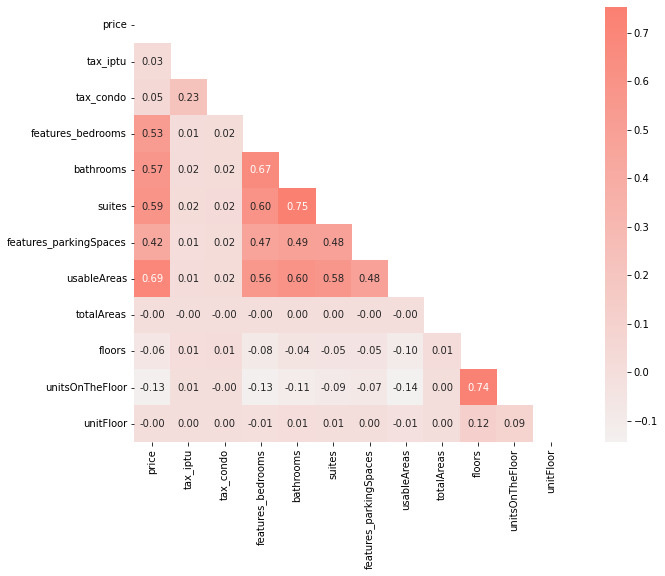

In [ ]:
sns.axes_style('white')
ax =plt.subplots(figsize=(13,8))
ax = sns.heatmap(correlacao, cmap= cores, mask = mascara, square=True, fmt='.2f', annot=True)

Análise da distribuição da variável resposta.

Text(0.5, 0, 'Preço')

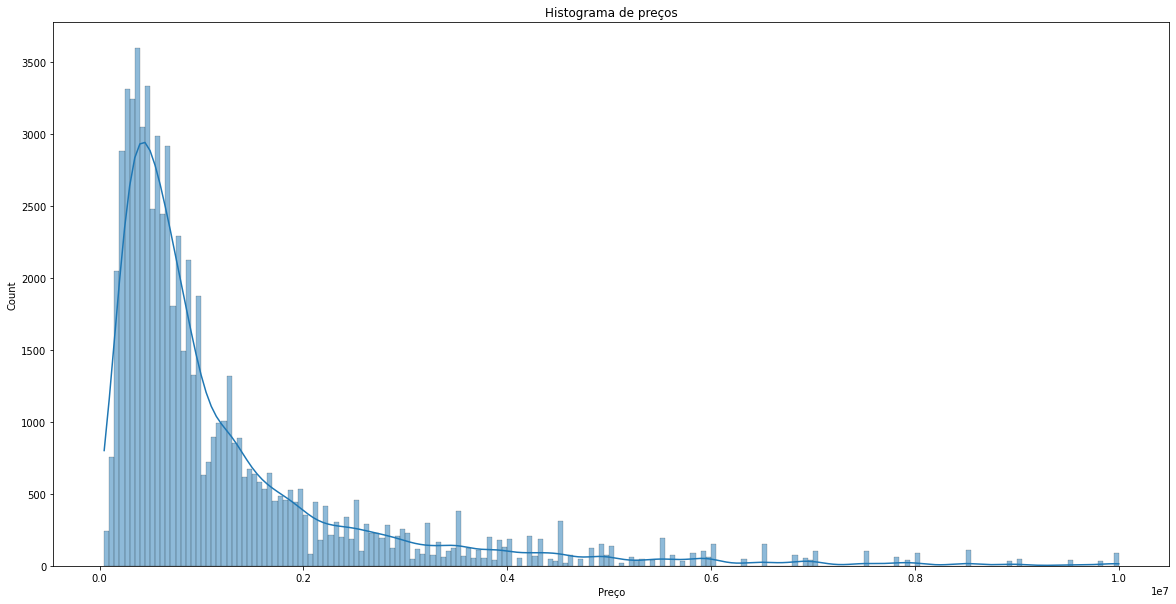

In [ ]:
ax = sns.histplot(data = dados_imoveis, x='price', kde = True)
ax.figure.set_size_inches(20,10)
ax.set_title('Histograma de preços')
ax.set_xlabel('Preço')

#O grafico abaixo é assimetrico, ou seja, há muitos imoveis de preços baixos, o que pode gerar 
#classificaçoes erradas para valores altos (nao consegue classificar bem valores altos)

#Portanto preciso aproximar essa curva da normal

### Transformação das variáveis 

Estamos realizando uma transformação logarítmica das variáveis para obtermos uma distribuição simétrica (mais próxima da normal), para que possamos usar o modelo de regressão linear. A transformação realizada é:


$$log1p = log(1+x)$$


Lembrar de realizar a transformação inversa para obter o valor original:


$$expm1 = exp(x) - 1$$ 




* Para mais detalhes consultar as documentações [`log1p`](https://numpy.org/doc/stable/reference/generated/numpy.log1p.html), [`expm1`](https://numpy.org/doc/stable/reference/generated/numpy.expm1.html#numpy.expm1) e [`FunctionTransformer`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.FunctionTransformer.html#sklearn.preprocessing.FunctionTransformer)



In [ ]:
#FunctionTransformer realiza um escalamento mais customizado dos dados
from sklearn.preprocessing import FunctionTransformer

transformer = FunctionTransformer(
    np.log1p #especifico a função que vai transformar meus dados
    #validate = True 
)

dados_transformados = transformer.transform(
    dados_imoveis.select_dtypes(exclude=['object']) #Pego apeans as colunas que não são objetos
)

dados_transformados = pd.concat([dados_imoveis.select_dtypes(include=['object']) ,dados_transformados], axis = 'columns')

In [ ]:
dados_transformados

,types_unit,zone,source,price,tax_iptu,tax_condo,features_bedrooms,bathrooms,suites,features_parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor
0,Outros,Zona Oeste,Website,10.714440,0.000000,5.017280,0.000000,0.000000,0.000000,0.693147,4.143135,4.143135,0.000000,0.000000,0.000000
1,Apartamento,Zona Oeste,Website,10.714440,0.000000,4.795791,1.098612,0.693147,0.000000,0.693147,3.806662,0.000000,0.000000,0.000000,0.000000
2,Outros,Zona Oeste,Website,10.819798,0.000000,4.615121,0.000000,0.000000,0.000000,0.000000,4.890349,4.890349,0.000000,0.000000,0.000000
3,Apartamento,Zona Oeste,Website,10.819798,4.795791,5.993961,1.386294,1.098612,0.693147,0.693147,4.110874,0.000000,1.386294,1.609438,1.098612
4,Outros,Zona Oeste,Website,10.819798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.303305,5.303305,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69583,Casa,Zona Oeste,Website,16.118096,7.972811,7.762596,1.791759,2.397895,0.693147,1.609438,6.932448,6.932448,0.000000,0.000000,0.000000
69584,Casa,Zona Oeste,Website,16.118096,9.615872,8.006701,1.791759,2.079442,1.791759,1.945910,6.621406,7.131699,0.000000,0.000000,0.000000
69585,Apartamento,Zona Sul,Website,16.118096,0.000000,0.000000,1.609438,1.791759,1.609438,1.386294,5.796058,5.796058,0.000000,0.000000,0.000000
69586,Casa,Zona Oeste,Website,16.118096,10.463132,7.783641,1.791759,2.397895,1.791759,1.609438,6.932448,6.932448,0.000000,0.000000,1.386294


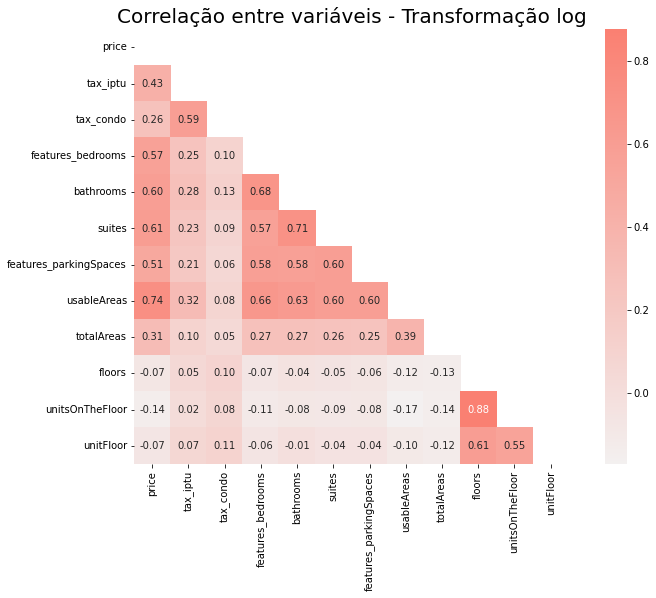

In [ ]:
correlacao_transformado = dados_transformados.corr()
mascara = np.zeros_like(correlacao_transformado)
mascara[np.triu_indices_from(correlacao_transformado)] = True

sns.axes_style('white')
ax = plt.subplots(figsize = (13,8))
ax = sns.heatmap(correlacao_transformado, cmap = cores, mask = mascara, square =True, fmt = '.2f', annot = True)
ax.set_title('Correlação entre variáveis - Transformação log', fontsize = 20)
ax
#Os valores muito altos foram reduzidos

Text(0.5, 0, 'Preço')

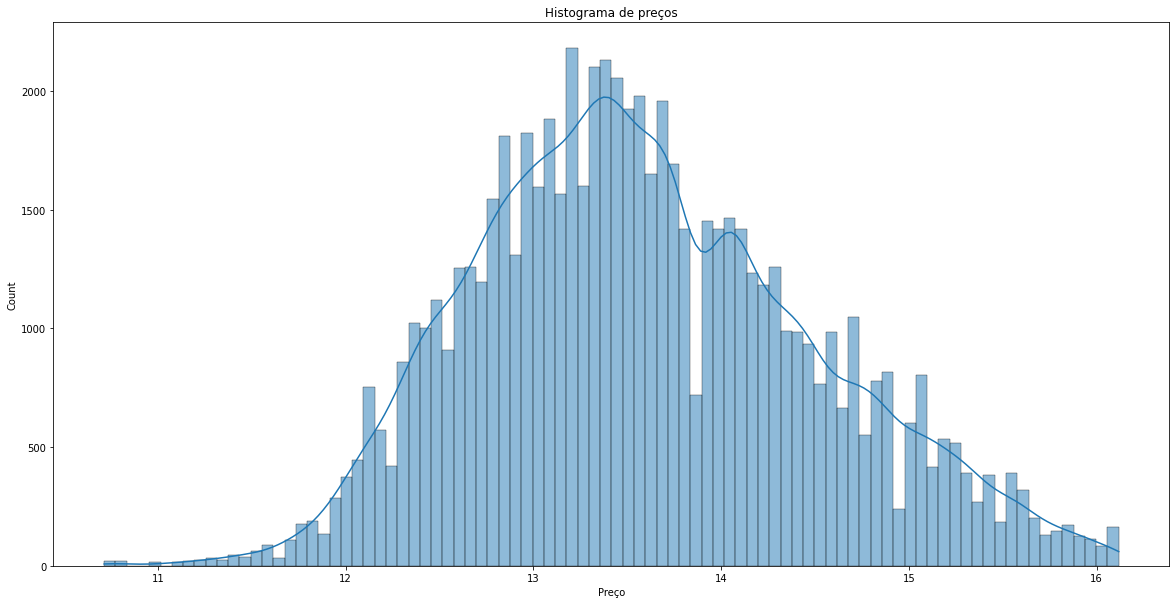

In [ ]:
ax = sns.histplot(data = dados_transformados, x='price', kde = True)
ax.figure.set_size_inches(20,10)
ax.set_title('Histograma de preços')
ax.set_xlabel('Preço')
#A distribuição se tornou mais normal

### Dummies

In [ ]:
variaveis_categoricas = dados_transformados.select_dtypes(include = ['object']).columns
variaveis_categoricas

Index(['types_unit', 'zone', 'source'], dtype='object')

In [ ]:
df_dummies = pd.get_dummies(dados_transformados[variaveis_categoricas])
df_dummies

,types_unit_Apartamento,types_unit_Casa,types_unit_Outros,zone_Zona Central,zone_Zona Norte,zone_Zona Oeste,zone_Zona Sul,source_Website
0,0,0,1,0,0,1,0,1
1,1,0,0,0,0,1,0,1
2,0,0,1,0,0,1,0,1
3,1,0,0,0,0,1,0,1
4,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...
69583,0,1,0,0,0,1,0,1
69584,0,1,0,0,0,1,0,1
69585,1,0,0,0,0,0,1,1
69586,0,1,0,0,0,1,0,1


In [ ]:
dados_imoveis_dummies = pd.concat([dados_transformados.select_dtypes(exclude=['object']), df_dummies],axis='columns')
dados_imoveis_dummies.head()

,price,tax_iptu,tax_condo,features_bedrooms,bathrooms,suites,features_parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor,types_unit_Apartamento,types_unit_Casa,types_unit_Outros,zone_Zona Central,zone_Zona Norte,zone_Zona Oeste,zone_Zona Sul,source_Website
0,10.714440,0.000000,5.017280,0.000000,0.000000,0.000000,0.693147,4.143135,4.143135,0.000000,0.000000,0.000000,0,0,1,0,0,1,0,1
1,10.714440,0.000000,4.795791,1.098612,0.693147,0.000000,0.693147,3.806662,0.000000,0.000000,0.000000,0.000000,1,0,0,0,0,1,0,1
2,10.819798,0.000000,4.615121,0.000000,0.000000,0.000000,0.000000,4.890349,4.890349,0.000000,0.000000,0.000000,0,0,1,0,0,1,0,1
3,10.819798,4.795791,5.993961,1.386294,1.098612,0.693147,0.693147,4.110874,0.000000,1.386294,1.609438,1.098612,1,0,0,0,0,1,0,1
4,10.819798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.303305,5.303305,0.000000,0.000000,0.000000,0,0,1,0,0,1,0,1


Antes de trabalhar com regressão
* Retirar as features muito relacionadas
* Ver a distribuição dos dados
* Ver se há outliers


## 2.2 - Regressão Linear

* "A análise de regressão diz respeito ao estudo da dependência de uma variável, a variável dependente, em relação a uma ou mais variáveis, as variáveis explanatórias, visando estimar e/ou prever o valor médio (da população) da primeira em termos dos valores conhecidos ou fixados (em amostragens repetidas) das segundas."

* [Documentação Sklearn - LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) 

* Regressão Simples: a variável dependente (regressando ou `y`) se relaciona a uma única variável explanatória (regressor ou `X`).

* Regressão Múltipla: a variável dependente (regressando ou `y`) se relaciona a mais de uma única variável explanatória (regressor ou `Xi`).


[slides]

## 2.3 - Ajuste e Previsão

### Divisão dos dados

In [ ]:
#Variáveis explanatórias (independentes)
x = dados_imoveis_dummies.drop('price', axis = 'columns')

#Variavel independente
y  = dados_imoveis_dummies['price']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.3, random_state=42)

### Modelo

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
#instanciado o modelo
lr = LinearRegression()

In [ ]:
#treino
lr.fit(treino_x, treino_y)

LinearRegression()

In [ ]:
previsao_lr = lr.predict(teste_x)

In [ ]:
previsao_lr

array([13.25768024, 12.45705313, 12.91487963, ..., 13.13161073,
       12.42379775, 14.49548233])

In [ ]:
#transformaçao inversa
np.expm1(previsao_lr[0])

572448.7539018441

## 2.4 - Métrica de desempenho

### Coeficiente de Determinação 

* descobrir quão “bem” uma linha de regressão amostral é adequada aos dados
* r2 situa-se entre 0 e 1
* "r2 mede a proporção ou percentual da variação total de Y explicada pelo modelo de regressão."
* Mede a variação entre o valor real e o valor previsto




In [ ]:
from sklearn.metrics import (
                              r2_score, #R2
                              mean_squared_error, #MSE
                              mean_absolute_percentage_error #MAPE
                             )

In [ ]:
print('R2 = %.2f%%' % (r2_score(teste_y, previsao_lr) * 100))

R2 = 78.81%


In [ ]:
print('MSE = %.2f' % (mean_squared_error(teste_y, previsao_lr)))

MSE = 0.17


In [ ]:
print('MAPE = %.2f%%' %  (mean_absolute_percentage_error(teste_y, previsao_lr) * 100))

MAPE = 2.30%


### Extra

* [Documentação Sklearn - Métricas para Regressão](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics)

* Observação: Estas métricas dependem da escala dos dados!!!

* MSE (Mean Squared Error ou Erro Quadrático Médio): média da diferença **elevada ao quadrado** entre o valor real e o previsto. *(penalidade sobre o erro)*

* MAE (Mean Absolute Error ou Erro Absoluto Médio): média da diferença **absoluta** (módulo) entre o valor real e o previsto.


# Aula 3 - Árvore de Decisão para Regressão






## 3.1 - Árvore de Decisão Classificação versus Regressão

[slides]

[Biblioteca Sklearn - Desicion Tree](https://scikit-learn.org/stable/modules/tree.html#regression)

**Dica de leitura**: [Capítulo 6 - Mãos à obra: aprendizado de máquina com Scikit-Learn, Keras & TensorFlow: Conceitos, ferramentas e técnicas para a construção de sistemas inteligentes](https://www.amazon.com.br/M%C3%A3os-obra-aprendizado-Scikit-Learn-inteligentes/dp/8550815489/ref=sr_1_2?keywords=machine+learning&qid=1658181249&sprefix=machine%2Caps%2C469&sr=8-2&ufe=app_do%3Aamzn1.fos.6d798eae-cadf-45de-946a-f477d47705b9), [Para saber mais: como funciona a árvore de decisão? - Classificação](https://cursos.alura.com.br/course/machine-learning-classificacao-tras-panos/task/107966)



## 3.2 - Implementando o Modelo


In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dtr = DecisionTreeRegressor(random_state = 42, max_depth =5) #Arvore de alta profundidade gera overfiting

In [ ]:
dtr.fit(treino_x , treino_y)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [ ]:
previsao_dtr = dtr.predict(teste_x)

In [ ]:
previsao_dtr

array([13.55136531, 12.33741035, 13.24458243, ..., 13.23643158,
       12.33741035, 14.55274625])

**Gráfico de erro de predição**: Um gráfico de erros de predição mostra os alvos reais em relação aos valores previstos. Em um modelo perfeito, esses pontos estariam alinhados em 45 grau.


Para saber mais sobre outras visualizações:
[**Documentação YellowBrick**](https://www.scikit-yb.org/en/latest/)



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


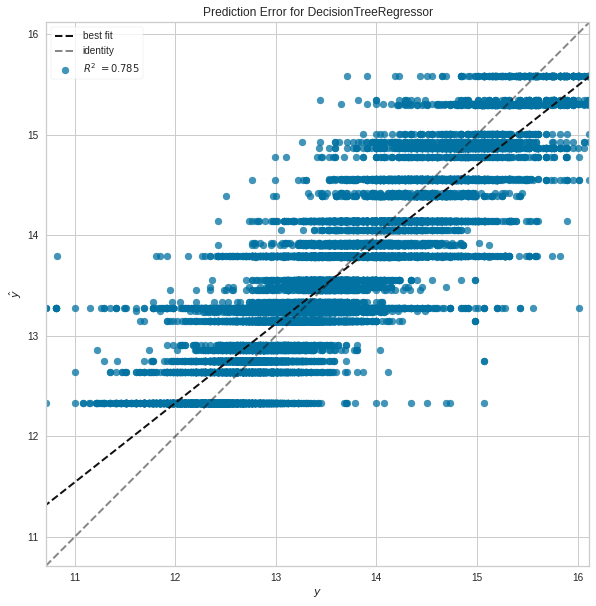

In [ ]:
from yellowbrick.regressor import PredictionError

plt.subplots(figsize=(10,10))
pev = PredictionError(dtr) #Instancio o grafico com a arvore
pev.fit(treino_x, treino_y) #Treino o grafico
pev.score(teste_x, teste_y) #Cria o score
pev.poof() #mostra o grafico 

#A linha cinza representa o melhor fit
#R2 = 78% o que é bastante bom

## 3.3 - Métrica

In [ ]:
#Coeficiente de determinaçao
r2_dtr = r2_score(teste_y, previsao_dtr)
print('R2 = %.2f%%' % (r2_score(teste_y, previsao_lr) * 100))

R2 = 78.81%


# Aula 4 - Random Forest para Regressão


## 4.1 - Modelo Ensemble

[slides] e [caderno]

[Biblioteca Sklearn - Random Forest Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor)

**Dica de leitura**: [Artigo Científico - Random Forests](https://link.springer.com/article/10.1023/A:1010933404324), [Wikipédia: Random Forests](https://en.wikipedia.org/wiki/Random_forest#:~:text=Random%20forests%20or%20random%20decision,class%20selected%20by%20most%20trees.), [Capítulo 4 - Livro Introduction to Statistical and Machine Learning Methods for Data Science](https://www.amazon.com.br/dp/B09C2DVZHR/ref=dp-kindle-redirect?_encoding=UTF8&btkr=1), [Capítulo 7 - Mãos à obra: aprendizado de máquina com Scikit-Learn, Keras & TensorFlow: Conceitos, ferramentas e técnicas para a construção de sistemas inteligentes](https://www.amazon.com.br/M%C3%A3os-obra-aprendizado-Scikit-Learn-inteligentes/dp/8550815489/ref=sr_1_2?keywords=machine+learning&qid=1658181249&sprefix=machine%2Caps%2C469&sr=8-2&ufe=app_do%3Aamzn1.fos.6d798eae-cadf-45de-946a-f477d47705b9) 

## 4.2 - Previsão

**Ponto de Atenção**
Os parâmetros são praticamente os mesmos entre o `DecisionTreeRegressor()` e o `RandomForestRegressor()`, com exceção de:

* `n_estimators`: quantidade de árvores na floresta
* `bootstrap`: define se será utilizado o método estatístico de amostragem *bootstrap*
* `oob_score`: define se será utilizado o método de amostragem *out-of-bag* para mensurar os erros da predição
* `n_jobs`: número de *jobs* rodando paralelamente (computação paralela - processadores)
* `warm_start`: faz a adequação de uma nova floresta ou usa uma floresta existente.
* `max_samples`: para o caso do `bootstrap` ser `True`, define o número de amostras a serem extraídas de X para treinar cada árvore base. 

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor(
                            random_state=42, 
                            n_estimators=10, #Numero de arvores 
                            max_depth=5 #profundidade de cada arvore
                          )

In [ ]:
rf.fit(treino_x, treino_y)

RandomForestRegressor(max_depth=5, n_estimators=10, random_state=42)

In [ ]:
previsao_rf = rf.predict(teste_x)

**Gráfico de erro de predição**

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


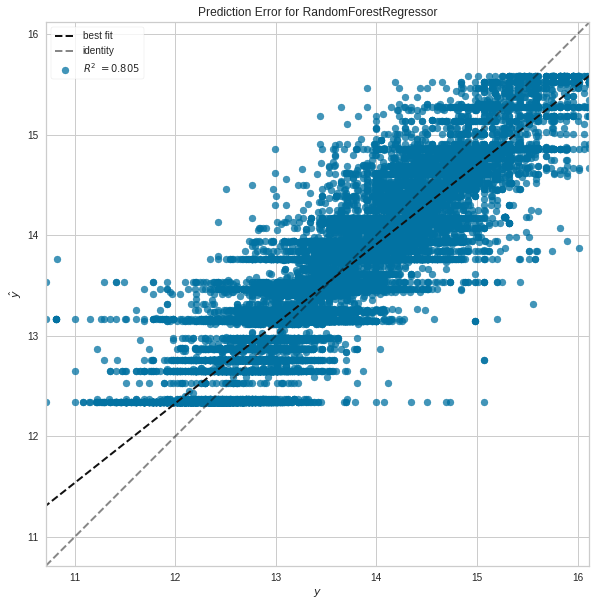

In [ ]:
from yellowbrick.regressor import PredictionError

plt.subplots(figsize=(10,10))
pev = PredictionError(rf) #Instancio o grafico com a arvore
pev.fit(treino_x, treino_y) #Treino o grafico
pev.score(teste_x, teste_y) #Cria o score
pev.poof() #mostra o grafico 

#A linha cinza representa o melhor fit
#R2 = 80%.5 o que é bastante bom

## 4.3 - Métrica de desempenho

In [ ]:
#Coeficiente de determinação (R2)
r2_rf = rf.score(teste_x, teste_y)
print('R2 = %.2f%%' % ( r2_rf* 100))

R2 = 80.53%


## Automatizando

In [ ]:
def cria_metricas(modelo, teste_x, teste_y, nome):
  from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
  
  previsao = modelo.predict(teste_x)
  mse = mean_squared_error(teste_y, previsao)
  mae = mean_absolute_error(teste_y, previsao)
  r2 = r2_score(teste_y, previsao)
  return pd.DataFrame(data = {'MSE':mse, 'MAE':mae, 'R2':'%.2lf%%'%(r2*100)}, index =[nome])

In [ ]:
floresta = cria_metricas(rf , teste_x, teste_y, 'Random Forest Regression')
linear = cria_metricas(lr, teste_x, teste_y, 'Linear Regression')
arvore = cria_metricas(dtr , teste_x, teste_y, 'Decision Tree Regression')

pd.concat([linear, arvore, floresta])

,MSE,MAE,R2
Linear Regression,0.173512,0.312049,78.81%
Decision Tree Regression,0.176277,0.312601,78.47%
Random Forest Regression,0.159426,0.298641,80.53%


# Aula 5 - Técnicas de Otimização


## 5.1 - Ferramentas de Otimização

* Por que otimizar?

* Quais ferramentas temos?

[Melhorando os hiperparâmetros - Documentação Sklearn](https://scikit-learn.org/stable/modules/grid_search.html#tuning-the-hyper-parameters-of-an-estimator)

### 1. Cross Validation (Validação Cruzada)

* [Documentação Cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html)

* **Cross Validation** é uma técnica muito utilizada para avaliação de desempenho de modelos e consequente verificação de tendências no aprendizado de máquina. Ele consiste em particionar os dados em subconjuntos (partes), onde um subconjunto é utilizado para treino e outro subconjunto é utilizado para teste e avaliação do desempenho do modelo.

* Os dados particionados são os de treino (70% dos dados originais)!

* **K-fold**: conjunto de treino é dividido de forma aleatória em K subconjuntos de aproximadamente mesmo tamanho, depois são realizados K iterações, onde K-1 subconjuntos são para treino e 1 para validação.

* O desempenho calculado pela validação cruzada k-fold é a média de todos os valores calculados em cada iteração.


### 2. Randomized Parameter Optimization (Otimização Aleatória de Parâmetros)

* [Documentação Randomized Search](https://scikit-learn.org/stable/modules/grid_search.html#randomized-parameter-optimization)

* [Artigo Científico sobre Random Search](https://www.jmlr.org/papers/volume13/bergstra12a/bergstra12a.pdf)

* "Define um espaço de busca como um domínio limitado de valores de hiperparâmetros e pontos de amostra aleatórios nesse domínio."

* Imagem no artigo sobre funcionamento desta busca



## 5.2 - Otimizando a árvore de decisão

In [ ]:
#Divisão do dataset
from sklearn.model_selection import KFold

#Definindo o k => numero de divisoes do dataset
cv = KFold(
      n_splits=5, #divido meu dataset em 5 subconjuntos
      shuffle = False
    ) 

In [ ]:
cv

KFold(n_splits=5, random_state=None, shuffle=False)

### Cross validation


In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
#Faço um treinamento mais inteligente do meu modelo com cross validation
desempenhoDT_cross_val_r2 = cross_val_score(
    estimator=dtr, #escolho o estimador
    X=treino_x, #dados de treino_x
    y=treino_y, #dados de treino_y
    scoring = 'r2', #metrica para validar o desempenho
    cv= cv #divisoes dos dados/estrategia de divisão dos dados (se eu botasse so 5 daria o mesmo valor)
)
print(f"Desempenho medio de r2 {round(100*desempenhoDT_cross_val_r2.mean(), 3)}")

Desempenho medio de r2 78.192


In [ ]:
#5 divisoes dos dados de treino e os scores deles
desempenhoDT_cross_val_r2

array([0.78037552, 0.78878676, 0.78694618, 0.77857972, 0.77491442])

### Random Search Validação
* Busca encontrar os melhores hiperparametros para instanciar um modelo

In [ ]:
#Buscando os melhores hiperparametros para instanciar o modelo de arvore de decisao
param_random_dt = {
    'criterion': ['squared_error', 'absolute_error'], #criterio de divisão de um nó
    'max_depth':[6,8,10,12,14,16], #profundidade da arvore
    'min_samples_leaf':[6,8,10], #quantidade minima de nós folhas (nós de decisao/finais)
    'min_samples_split':[8,10,14,16], #Quantidade minima de amostras necessárias para dividir um nó interno
    'max_features':['sqrt','log2','auto'] #escolha das melhores features/colunas do dataframe de acordo com essas funçoes
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
#instanciando random search cross validation
random_cv_dt=RandomizedSearchCV(
    estimator = dtr, #modelo
    param_distributions = param_random_dt, #dicionario com os hiperparametros
    n_iter = 5, #numero de iterçoes
    scoring = 'r2', #metrica de escolha do modelo com os melhores hiperparametros
    cv = cv,  #O criterio de validaçao cruzada é KFold (5 divisoes do dataset)
    n_jobs=-1, #reduz a demanda de poder computacional
    random_state = 42
)

In [ ]:
#treino o modelo e armazeno o resultado
randomcv_dt = random_cv_dt.fit(treino_x, treino_y)

In [ ]:
#Retorna os melhores hiperparametros para meus dados de treino e meu modelo
randomcv_dt.best_params_

{'min_samples_split': 8,
 'min_samples_leaf': 10,
 'max_features': 'auto',
 'max_depth': 14,
 'criterion': 'absolute_error'}

In [ ]:
#Retorna o score do modelo com os melhores hiperparametros
randomcv_dt.best_score_

0.8603451510105706

In [ ]:
#Retorna os resultados da validação cruzada (5 divisoes)
pd.DataFrame(randomcv_dt.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,71.823491,1.262883,0.005210,0.000293,8,8,auto,16,absolute_error,"{'min_samples_split': 8, 'min_samples_leaf': 8...",0.855675,0.857809,0.865710,0.857807,0.849735,0.857347,0.005121,2
1,0.054717,0.001991,0.004447,0.000206,16,6,sqrt,10,squared_error,"{'min_samples_split': 16, 'min_samples_leaf': ...",0.810791,0.814230,0.816324,0.820272,0.800462,0.812416,0.006720,4
2,0.066022,0.004586,0.004292,0.000251,8,6,sqrt,16,squared_error,"{'min_samples_split': 8, 'min_samples_leaf': 6...",0.838132,0.840920,0.843799,0.838843,0.831145,0.838568,0.004202,3
3,0.120157,0.005257,0.003565,0.000289,14,8,auto,6,squared_error,"{'min_samples_split': 14, 'min_samples_leaf': ...",0.805712,0.811746,0.815655,0.801029,0.799168,0.806662,0.006253,5
4,71.193759,0.751969,0.004132,0.000365,8,10,auto,14,absolute_error,"{'min_samples_split': 8, 'min_samples_leaf': 1...",0.861123,0.862015,0.866960,0.859304,0.852324,0.860345,0.004745,1


### Random Search Teste

In [ ]:
dtr_otimizado = DecisionTreeRegressor(
      criterion='absolute_error',
      max_depth=10,
      max_features='auto', 
      min_samples_split=8, 
      min_samples_leaf=10
    )

In [ ]:
dtr_otimizado.fit(treino_x, treino_y)

DecisionTreeRegressor(criterion='absolute_error', max_depth=10,
                      max_features='auto', min_samples_leaf=10,
                      min_samples_split=8)

In [ ]:
dtr_otimizado.score(teste_x, teste_y)

0.8532378541591641

## 5.3 - Otimizando a Random Forest

### Cross validation

In [ ]:
desempenhoRF_cross_val_r2 = cross_val_score(
    estimator = rf,
    X = treino_x,
    y = treino_y,
    scoring = 'r2',
    cv = cv
)
print(f'Desempenho médio de r2: {round(desempenhoRF_cross_val_r2.mean()*100, 3)}%')

Desempenho médio de r2: 80.07%


### Random Search Validação

Definindo os parâmetros

In [ ]:
param_random_rf = {
    'n_estimators': [150 ,200], #numero de arvores
    'max_depth': [20,30], #profundidade de cada arvore
    'min_samples_split':[8, 10], #numero de amostras para dividir o nó
    'min_samples_leaf':[3] #numero mínimo de folhas
}

In [ ]:
random_cv_rf = RandomizedSearchCV(
    rf,
    param_random_rf,
    n_iter = 5, #Peço apenas 5 combinaçoes de resultado
    cv = cv,
    scoring ='r2',
    n_jobs=-1,
    random_state = 42
)

In [ ]:
rf_randomcv = random_cv_rf.fit(treino_x, treino_y)

In [ ]:
pd.DataFrame(rf_randomcv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,33.126216,0.183160,0.465696,0.063281,200,8,3,20,"{'n_estimators': 200, 'min_samples_split': 8, ...",0.894692,0.897122,0.898996,0.894519,0.887916,0.894649,0.003752,2
1,33.541258,0.425377,0.423595,0.029786,200,8,3,30,"{'n_estimators': 200, 'min_samples_split': 8, ...",0.894741,0.897206,0.898988,0.894511,0.887961,0.894681,0.003745,1
2,24.603734,0.239206,0.318144,0.019432,150,8,3,20,"{'n_estimators': 150, 'min_samples_split': 8, ...",0.894645,0.897018,0.898972,0.894132,0.887818,0.894517,0.003772,3
3,32.659433,0.335536,0.418227,0.025126,200,10,3,30,"{'n_estimators': 200, 'min_samples_split': 10,...",0.894492,0.896805,0.898744,0.894206,0.887629,0.894375,0.003756,4
4,23.951574,1.777770,0.309681,0.026877,150,10,3,20,"{'n_estimators': 150, 'min_samples_split': 10,...",0.894397,0.896589,0.898748,0.893765,0.887517,0.894203,0.003776,5


In [ ]:
rf_randomcv.best_params_

{'n_estimators': 200,
 'min_samples_split': 8,
 'min_samples_leaf': 3,
 'max_depth': 30}

In [ ]:
rf_randomcv.best_score_

0.8946812605788613

### Random Search Teste

In [ ]:
rf_otimizado2 = RandomForestRegressor(
      random_state =42,
      max_depth=30,
      n_estimators=200,
      min_samples_split=8,
      min_samples_leaf=3
    )

In [ ]:
rf_otimizado2.fit(treino_x, treino_y)

RandomForestRegressor(max_depth=30, min_samples_leaf=3, min_samples_split=8,
                      n_estimators=200, random_state=42)

In [ ]:
rf_otimizado2.score(teste_x, teste_y)

0.8950831949839898

## 5.4 - Escolhendo o melhor modelo

In [ ]:
#tabela de resultados
print('Random Search')
print("="*30)
print("Árvore de Decisão: %f" % dtr_otimizado.score(teste_x, teste_y))
print("Floresta Aleatória: %f" % rf_otimizado2.score(teste_x, teste_y))
print("*"*30)

print("Cross Validation")
print("="*30)
print("Árvore de Decisão: %f" % round(desempenhoDT_cross_val_r2.mean(), 3))
print("Floresta Aleatória: %f" % round(desempenhoRF_cross_val_r2.mean(), 3))

Random Search
Árvore de Decisão: 0.853238
Floresta Aleatória: 0.895083
******************************
Cross Validation
Árvore de Decisão: 0.782000
Floresta Aleatória: 0.801000


In [ ]:
treino_x

,tax_iptu,tax_condo,features_bedrooms,bathrooms,suites,features_parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor,types_unit_Apartamento,types_unit_Casa,types_unit_Outros,zone_Zona Central,zone_Zona Norte,zone_Zona Oeste,zone_Zona Sul,source_Website
21547,4.762174,6.746412,1.098612,0.693147,0.000000,0.693147,3.970292,3.970292,0.000000,0.000000,0.000000,1,0,0,0,0,1,0,1
43181,0.000000,6.216606,1.791759,1.386294,0.693147,1.386294,5.564520,5.564520,0.000000,0.000000,0.000000,0,1,0,0,0,1,0,1
2325,0.000000,5.442418,1.098612,0.693147,0.000000,0.000000,4.262680,4.262680,0.000000,0.000000,0.000000,1,0,0,0,1,0,0,1
34447,0.000000,6.685861,1.386294,1.098612,0.693147,1.098612,4.477337,4.477337,1.386294,2.397895,1.098612,1,0,0,0,0,1,0,1
24645,2.397895,2.397895,1.386294,1.098612,0.693147,0.693147,4.382027,4.382027,0.000000,0.000000,0.693147,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37194,0.000000,0.000000,1.098612,1.098612,0.000000,1.098612,5.153292,5.153292,0.000000,0.000000,0.000000,1,0,0,0,0,1,0,1
6265,0.000000,5.908083,1.098612,0.693147,0.000000,0.693147,3.891820,3.891820,0.000000,0.000000,0.000000,1,0,0,0,0,1,0,1
54886,3.044522,3.044522,1.386294,1.098612,0.693147,0.693147,4.605170,4.605170,0.000000,0.000000,0.000000,1,0,0,0,0,0,1,1
860,0.000000,0.000000,1.098612,0.693147,0.000000,0.000000,4.204693,4.204693,0.000000,0.000000,0.000000,1,0,0,0,0,1,0,1
